# Project Proposal (Group 5)

# Group Member:
Chenyi Zhao (72337454)
<br>Anyna Wang  (53713814)
<br>Jerry(Qun) Gai (72356637)
<br>Ritisha Jhamb (61345534)

# Title
##### Finding correlations between smoking status and sleep efficiency by statistical inference

# Introduction
Sleep efficiency is the ratio of time spent in bed to total bedtime, abbreviated as SE (Reed & Sacco, 2016). Poor sleeping efficiency not only affects our mood but also negatively affects our physical health. According to Ramos et al.'s research, for every 10% decrease in sleeping efficiency, hypertension increased by 7.5% (2018). Many factors have been studied to affect sleeping efficiency, such as age, gender, media use, etc. The relevant study has investigated the correlation between smoking and sleep disturbance, in which sleep disorder is very common among smokers (Jaehne et al., 2012).

This dataset comes from a data modelling and data analysis competition platform called Kaggle. The dataset contains 15 columns of sleeping pattern information for 452 test subjects, such as age, gender, sleeping duration, sleeping efficiency, smoking status, caffeine consumption and alcohol consumption within 24 hours before bedtime for each test subject etc. We will use sleeping efficiency as the random variable of interest and smoking status as the category for comparison, where "Yes" means smoking and "No" means no smoking in the dataset.
 
We hope to further explore the relationship between smoking status and sleep efficiency through statistical inference. We will use the bootstrap and asymptotic methods to test the hypothesis of the difference in means of sleep efficiency between the two groups of smokers. We'll also calculate the 95% confidence interval of the difference in means using CLT. Finally, the bootstrap method was used to test the hypothesis of the difference in medians of sleep efficiency between two groups of smokers to evaluate the rationality and effectiveness of the estimation.

# Methods and Results

In this section, we conduct our formal analysis and it consists of several subsections:

1. Premliminary Results: This is our initial exploration of the dataset.

2. Check conditions for CLT: Here, we check the conditions for applying Central Limit Theorem into our inference analysis.

3. Inference Analysis: Here, we conduct several inference analysis to test if smoking can indeed influence sleep efficiency and it includes:

    1. Two-sample t-test of Difference in means.
    2. Simulation-based hypothesis testing of Difference in means.
    3. 95% Theory-based Confidence Interval of Difference in means.
    4. Theory-based hypothesis testing of Difference in medians.



4. Comparison between bootstrapping and asymptotics methods.

## Preliminary Results

In [1]:
# Load the needed libraries
library(tidyverse)
library(infer)
library(nycflights13)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Read the dataset into R and set seed to make sure our codes are reproducible
set.seed(1)
se <- read_csv("https://raw.githubusercontent.com/GerGerGai/STAT-201-Group-5/main/Sleep_Efficiency.csv")

Rows: 452 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): Gender, Smoking status
dbl  (11): ID, Age, Sleep duration, Sleep efficiency, REM sleep percentage, ...
dttm  (2): Bedtime, Wakeup time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Take a look at the dataset.

Note that the dataset is already in tidy format with each column representing one variable, each row representing one observation and each cell containing one single value.

We make a small improvement by adding "_" to column names to make them easier to edit

We also filter out rows containing NAs in Sleep_efficiency or Smoking_status columns

In [3]:
colnames(se) <- c('ID','Age','Gender','Bedtime','Wakeup_time','Sleep_duration','Sleep_efficiency','REM_sleep_percentage','Deep_sleep_percentage','Light_sleep_percentage',
                 'Awakenings','Caffeine_consumption','Alcohol_consumption','Smoking_status','Exercise_frequency')
se <- se|>filter(!is.na(Sleep_efficiency) & !is.na(Smoking_status)) 
head(se)

ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
<dbl>,<dbl>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0,0,0,Yes,3
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3,0,3,Yes,3
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0,0,No,3
4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3,50,5,Yes,1
5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0,3,No,3
6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0,NA,0,No,1


#### Table 1: First 6 rows of sleep efficiency dataset                                                   

Plot Sleep Efficiency vs Age, and colored the points by Smoking Status.

The purpose of this plot is to see if we can get any indications that smoking status can impact sleep efficiency.

Note that most of the points at the bottom of the plot (Sleep Efficiency < 0.6) are colored by Smoking Status == 'Yes'.

Hence, there is a possibility that smoking can reduce sleep efficiency.

We will do more thorough analysis to see if this plot reflects the truth or is due to sample variations.

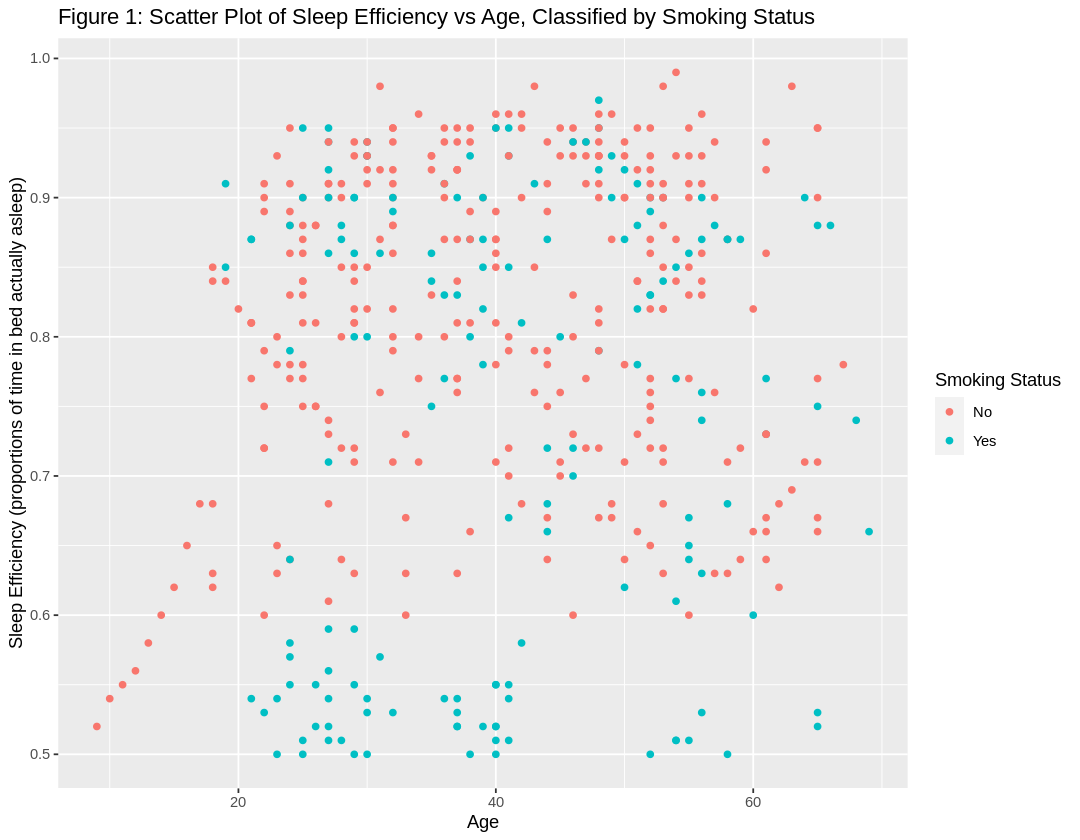

In [4]:
library(repr)
options(repr.plot.width=9, repr.plot.height=7)

smoking_se_plot <- se |> 
ggplot()+
geom_point(aes(x = Age, y = Sleep_efficiency, color = Smoking_status))+
labs(x = "Age", y = "Sleep Efficiency (proportions of time in bed actually asleep)", 
    title = "Figure 1: Scatter Plot of Sleep Efficiency vs Age, Classified by Smoking Status",
                color = "Smoking Status")

smoking_se_plot

Here, we compute the means of sleep efficiency across the two smoking groups.

We also compute the medians of sleep efficiency across the two smoking groups as our second variable.

Note that there is a 0.06 difference in medians of sleep efficiency between the two smoking groups, which might further indicate
that smoking can impact sleep efficiency.

Hence, in addition to the comprehensive analysis on difference of means of sleep efficiency between the two groups, we will
also do a bit analysis on difference of medians of sleep efficiency between the two groups to see if this is also the truth.

In [5]:
summarize_table <- se |>
                    group_by(Smoking_status)|>
                    summarize(mean_efficiency = mean(Sleep_efficiency),
                              median_efficiency = median(Sleep_efficiency))
summarize_table

Smoking_status,mean_efficiency,median_efficiency
<chr>,<dbl>,<dbl>
No,0.8170805,0.84
Yes,0.7344156,0.78


#### Table 2: Calculated means and medians of sleep efficiency across the two smoking groups


We include the means of sleep efficiency of the two smoking groups into our plot to facilitate our presentation.

Red for Smoking Status == "No" and Green for Smoking Status == "Yes".

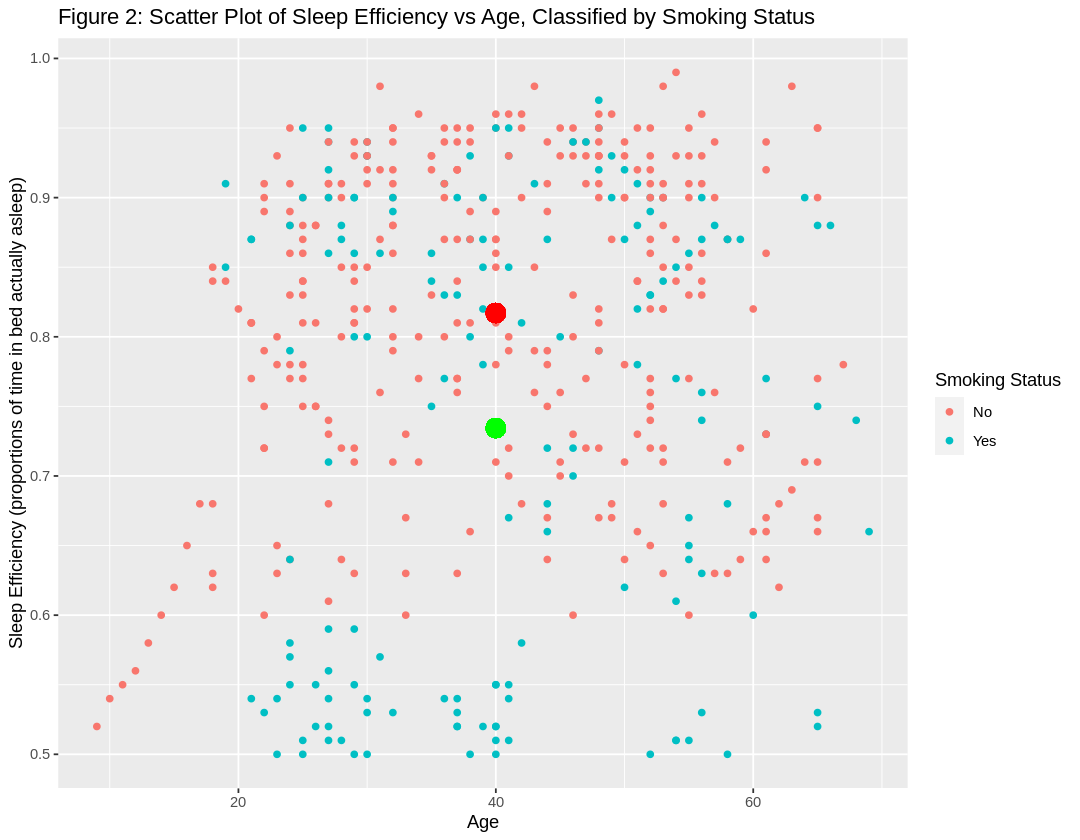

In [6]:
smoking_se_plot + geom_point(aes(x=40,y = summarize_table$mean_efficiency[1]),color = "red", size = 5)+
                  geom_point(aes(x=40,y = summarize_table$mean_efficiency[2]),color = "green", size = 5)+
                ggtitle("Figure 2: Scatter Plot of Sleep Efficiency vs Age, Classified by Smoking Status")

Plot a boxplot to facilitate comparisons.

Note that there is a clear difference of means and medians between the two smoking groups from our sample.

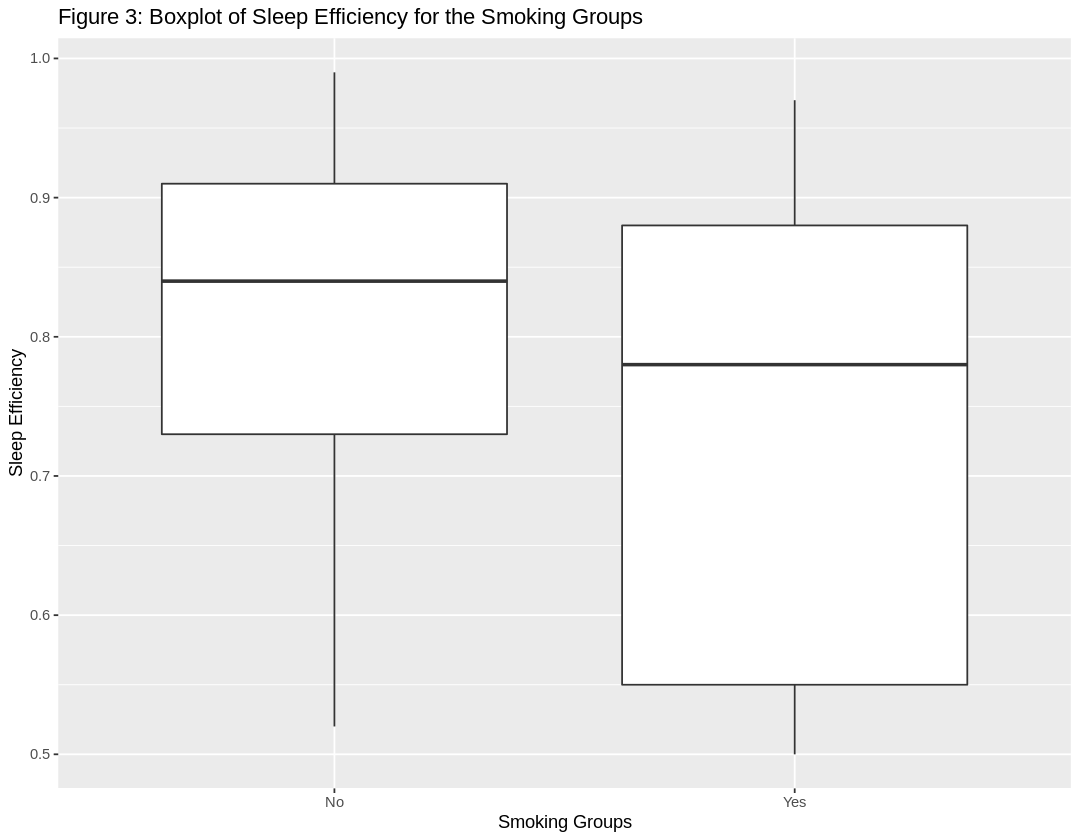

In [7]:
smoking_se_boxplot <- se |> ggplot(aes(x = Smoking_status, y = Sleep_efficiency))+
                                geom_boxplot()+
                                labs(y = "Sleep Efficiency", x = "Smoking Groups",
                                     title = "Figure 3: Boxplot of Sleep Efficiency for the Smoking Groups")
smoking_se_boxplot

## Check the conditions for applying CLT ##

Before we start the fomal analysis, we'll first check the conditions for applying CLT. If all the following conditions are met, we are good to use both simulation-based and theory-based methods for hypothesis testing and constructing confidence intervals.:


1. The samples were randomly drawn and observations are indenpendent of one another.
2. The estimator being used involves a sum of random componenets.
3. The population distribution is approximately normal (we get an approximation of the population by our sample distribution) or the sample size is large enough (n > 30).

Based on the data description from Kaggle, we can confirm that the samples were randomly drawn and observations are indenpendent of one another.

The estimator here is the difference of means (For medians, we'll only use theory-based method). The calculation of means involves the sum of sleep efficiency, which is a random component.

The following codes are used to check the third condition:

In [8]:
# First select the two useful columns.
se_useful <- se |> select(Sleep_efficiency, Smoking_status)
head(se_useful)

Sleep_efficiency,Smoking_status
<dbl>,<chr>
0.88,Yes
0.66,Yes
0.89,No
0.51,Yes
0.76,No
0.90,No


#### Table 3: Sleep efficiency and Smoking status

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



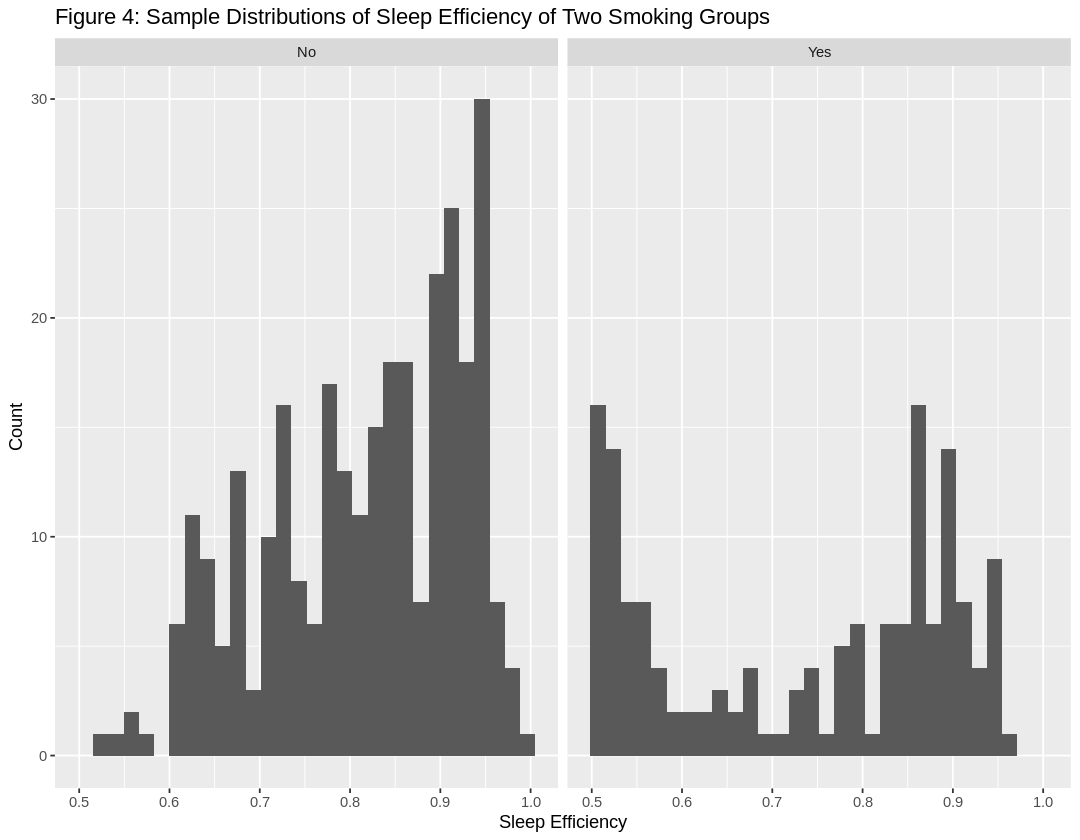

In [9]:
# Draw the sample distribution of sleep efficiency of the two smoking groups.
# The sample distributions serve as estimates to the population distributions.
# Note that both groups have non-normal sample distributions, which indicates that we need a large sample size in order to apply CLT.
sample_dis <- se_useful |>
                ggplot()+
                geom_histogram(aes(x = Sleep_efficiency))+
                labs(x = "Sleep Efficiency", y = "Count",
                     title = "Figure 4: Sample Distributions of Sleep Efficiency of Two Smoking Groups")+
                facet_wrap(~Smoking_status)
sample_dis

In [10]:
# We can see from the following table that sample sizes for both groups are large enough (n1 > 50, n2 > 50). 
sample_sizes <- se_useful |>
                group_by(Smoking_status)|>
                summarize(n = n())
sample_sizes

Smoking_status,n
<chr>,<int>
No,298
Yes,154


#### Table 4: Sample sizes for each smoking group 

Hence, we are good to apply theory-based methods to analyze difference in means.

## Inference Analysis

### Two-sample t-test of Difference in means

First, we conduct a two-sample t-test hypothesis testing of difference in means (theory-based), at 5% significance level.

$\mu_1:$ Sample mean of sleep efficiency of Non-smokers

$\mu_2:$ Sample mean of sleep efficiency of Smokers

$H_0: \mu_1 - \mu_2 = 0$ (Smoking status does not affect sleep efficiency) vs $H_1: \mu_1 - \mu_2 > 0$ (Smoking can affect sleep efficiency and make it worse) 

#### Reasons for choosing the direction of $H_1$ and the 5% significance level.

We decided to state the alternative hypothesis to be greater than 0 because Table 2 shows that the average sleep efficiency of non-smokers is higher than that of smokers. And Figure 3 shows that the median sleep efficiency of the non-smoking group is higher than that of the smoking group. Therefore, we assume that the difference between the average sleep efficiency of non-smokers minus the average sleep efficiency of smokers is greater than 0 as an alternative hypothesis.

Secondly, we setted the significance level to be 5% because it is the most common to take 5% as the significance level in many studies. If we want to reduce the occurrence probability of type I error as much as possible, we must reduce the significance level. On the other hand, our sample size is not particularly large so we will use a greater significance level than 1%.


In [11]:
# Calculate the observed t-statistic

obs_two_sample_t <- se_useful %>% 
  specify(formula = Sleep_efficiency ~ Smoking_status) %>% 
  calculate(stat = "t", order = c("No", "Yes"))

obs_two_sample_t

stat
<dbl>
5.704998


Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


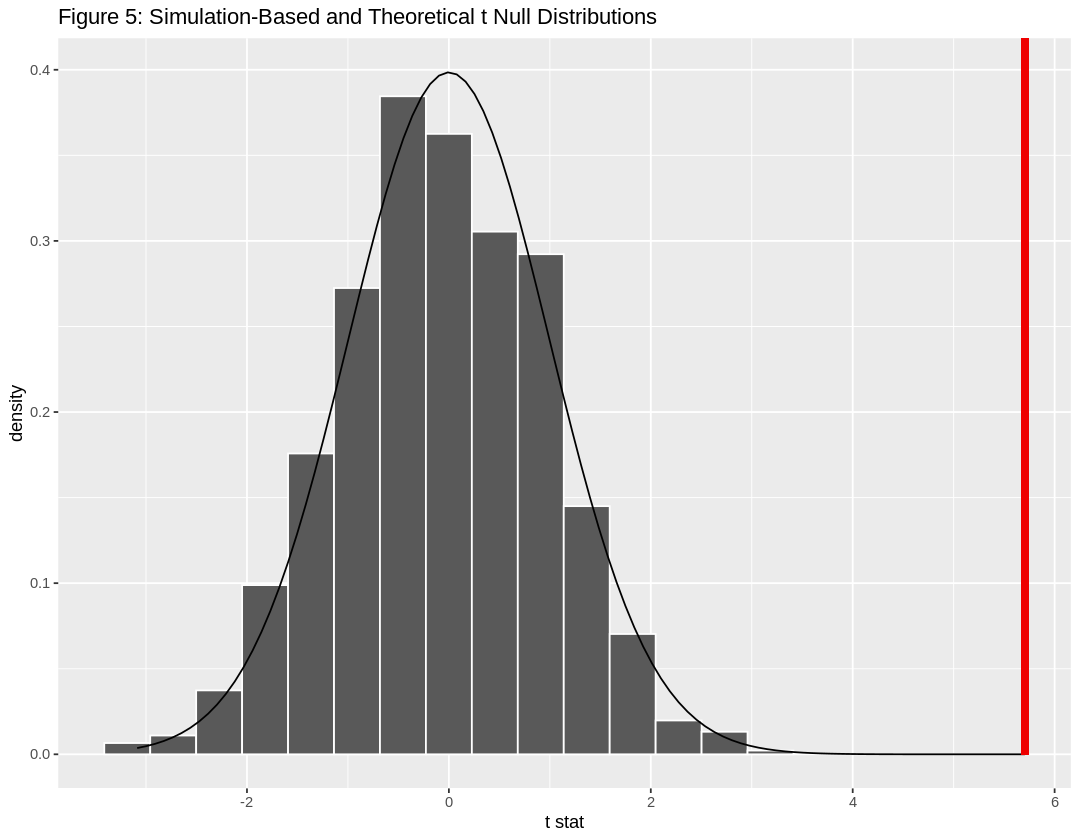

In [12]:
# Construct null distribution of t

null_distribution_t <- se_useful %>% 
  specify(formula = Sleep_efficiency ~ Smoking_status) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("No", "Yes"))

# Visualize the null distribution of t along with the t-distribution curve with degree of freedom = 298 + 154 - 2 = 450
# Include our observed t-statistic into the plot and shade the p-value

visualize(null_distribution_t, method = "both")+
    shade_p_value(obs_stat = obs_two_sample_t, direction = "right")+
    ggtitle("Figure 5: Simulation-Based and Theoretical t Null Distributions")

In [13]:
# Get the p-value.

null_distribution_t |> 
    get_p_value(obs_stat = obs_two_sample_t, direction = "right")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


#### Conclusion:

We usually don't report a p-value of 0. Hence, we will say that p-value<0.00001. Since we get a p-value<0.00001, which is much less than 0.05, we reject $H_0$ and favor the $H_1$ that smoking can affect sleep efficiency and make it worse.

### Simulation-based hypothesis testing of Difference in means

Secondly, we conduct a simulation-based hypothesis testing of difference in means (utilizing the infer package), at 5% significance level.

$H_0$ and $H_1$ are the same as before.

In [14]:
# Calculate the observed difference.
obs_diff_means <- se_useful |>
                    specify(Sleep_efficiency ~ Smoking_status)|>
                    calculate(stat = "diff in means", order = c("No","Yes"))
obs_diff_means

stat
<dbl>
0.08266495


In [15]:
# Construct the null distribution assuming the null hypothesis is true.

null_diff_means <- se_useful |>
                    specify(Sleep_efficiency ~ Smoking_status)|>
                    hypothesize(null = "independence")|>
                    generate(reps = 1000, type = "permute")|>
                    calculate(stat = "diff in means", order = c("No", "Yes"))

head(null_diff_means)

replicate,stat
<int>,<dbl>
1,-0.010410093
2,0.019137540
3,-0.003318661
4,0.001999913
5,0.005447137
6,-0.020160812


#### Table 5: Difference in sleep Efficiency means under null hypothesis

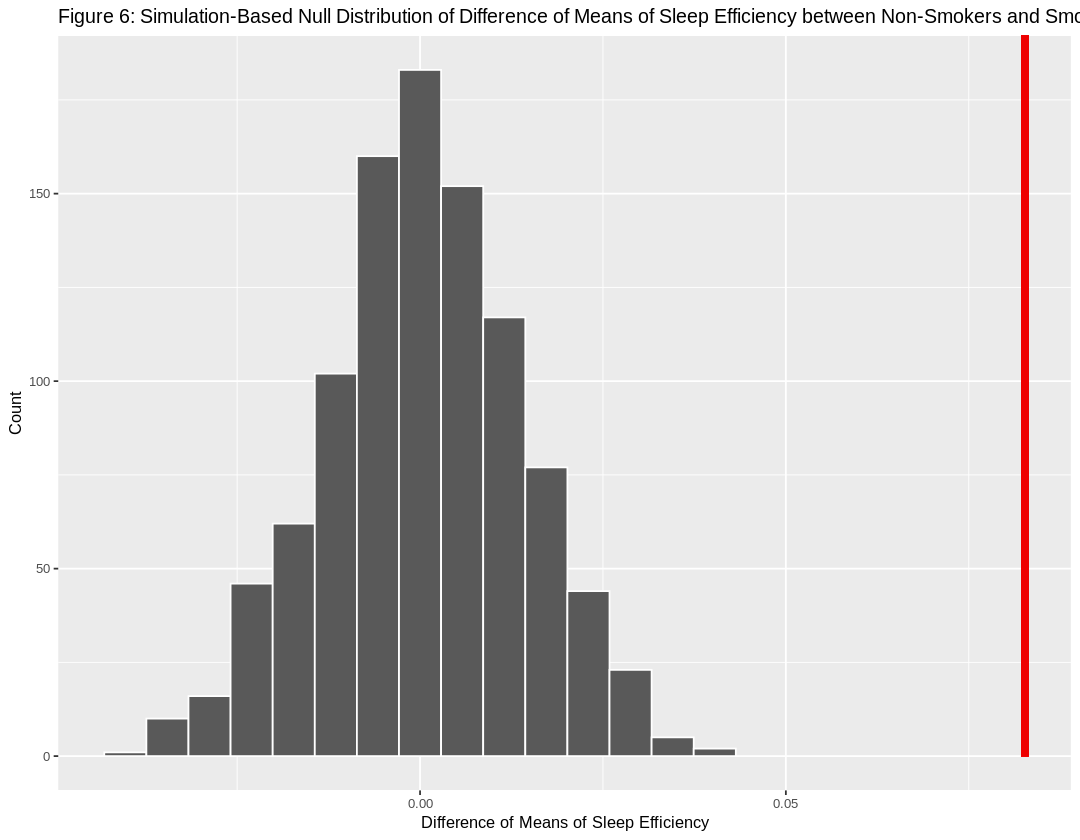

In [16]:
# Visualize the null distribution together with the observed difference.
# Shade the p-value as well.

null_visual <- null_diff_means |> 
                visualize()+
                shade_p_value(obs_stat = obs_diff_means, direction = "right")+
                labs(x = "Difference of Means of Sleep Efficiency", y = "Count", 
                     title = "Figure 6: Simulation-Based Null Distribution of Difference of Means of Sleep Efficiency between Non-Smokers and Smokers")+
                theme(text = element_text(size = 9.8))

null_visual

In [17]:
# Get the p-value.

null_diff_means %>% 
  get_p_value(obs_stat = obs_diff_means, direction = "right")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


#### Conclusion:

We get a p-value<0.00001, which is much less than 0.05. Hence, we reject $H_0$ and favor the $H_1$ that smoking can affect sleep efficiency and make it worse at 5% significance level.

### 95% Theory-based Confidence Interval of Difference in means

We're going to utilize the CLT to construct a 95% CI for difference in means between the two groups.

Since $n_1 > 50$ and $n_2 > 50$, we can rely on a normal distribution to approximate the sampling distribution of $\bar{X}_1-\bar{X}_2$ by:

$$
\bar{X}_1-\bar{X}_2\sim N\left(\mu_1 - \mu_2, \sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}\right)
$$

$$
CI\left(\mu_1 - \mu_2\right) = \left(\bar{X}_1-\bar{X}_2\right) \pm z^*\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}
$$
where $z^*$ is the quantile of a standard Normal, $s^2_1$ and $s^2_2$ are the variances of the two samples.

We will then check if 0 is within the interval,

In [18]:
# Pull out useful vectors.

non_smokers <- se_useful|> # sleep efficiency of non-smokers
                filter(Smoking_status == "No")|>
                pull(Sleep_efficiency)

smokers <- se_useful |>    # sleep efficiency of smokers
            filter(Smoking_status == "Yes")|>
            pull(Sleep_efficiency)

# Calculate statistics.
diff_means <- mean(non_smokers) - mean(smokers)
var1 <- var(non_smokers)
var2 <- var(smokers)
n1 <- length(non_smokers) 
n2 <- length(smokers)
sd <- sqrt((var1/n1) + (var2/n2)) # the standard deviation used to construct the CI

# Construct the 95% CI based on CLT

se_diff_ci <- 
        tibble(
                lower_ci = diff_means - qnorm(0.975)*sd,
                upper_ci = diff_means + qnorm(0.975)*sd
        )
se_diff_ci



lower_ci,upper_ci
<dbl>,<dbl>
0.05426524,0.1110647


#### Table 6: 95% confidence interval of difference in sleep efficiency means 

#### Conclusion:

We are 95% confident that the true difference in means of sleep efficiency between non-smokers and smokers is within the interval $[0.05426524,0.1110647
]$. Since 0 is not in the interval, we favor the statement that smoking can affect sleep efficiency and make it worse.

### Theory-based hypothesis testing of Difference in medians

Finally, we will conduct a theory-based hypothesis testing of Difference in medians of sleep efficiency between the two groups, at 5% significance level.

$m_1:$ Sample median of sleep efficiency of Non-smokers

$m_2:$ Sample median of sleep efficiency of Smokers

$H_0: m_1 - m_2 = 0$ (Smoking status does not affect sleep efficiency) vs $H_1: m_1 - m_2 > 0$ (Smoking can affect sleep efficiency and make it worse) 

In [19]:
# First, calculate the observed difference.
obs_diff_medians <- se_useful |>
                    specify(Sleep_efficiency ~ Smoking_status)|>
                    calculate(stat = "diff in medians", order = c("No","Yes"))
obs_diff_medians

stat
<dbl>
0.06


In [20]:
# Construct the null distribution assuming the null hypothesis is true.

null_diff_medians <- se_useful |>
                    specify(Sleep_efficiency ~ Smoking_status)|>
                    hypothesize(null = "independence")|>
                    generate(reps = 1000, type = "permute")|>
                    calculate(stat = "diff in medians", order = c("No", "Yes"))

head(null_diff_medians)

replicate,stat
<int>,<dbl>
1,0.000
2,-0.010
3,0.020
4,0.050
5,0.000
6,-0.005


#### Table 7: Difference in sleep Efficiency medians under null hypothesis

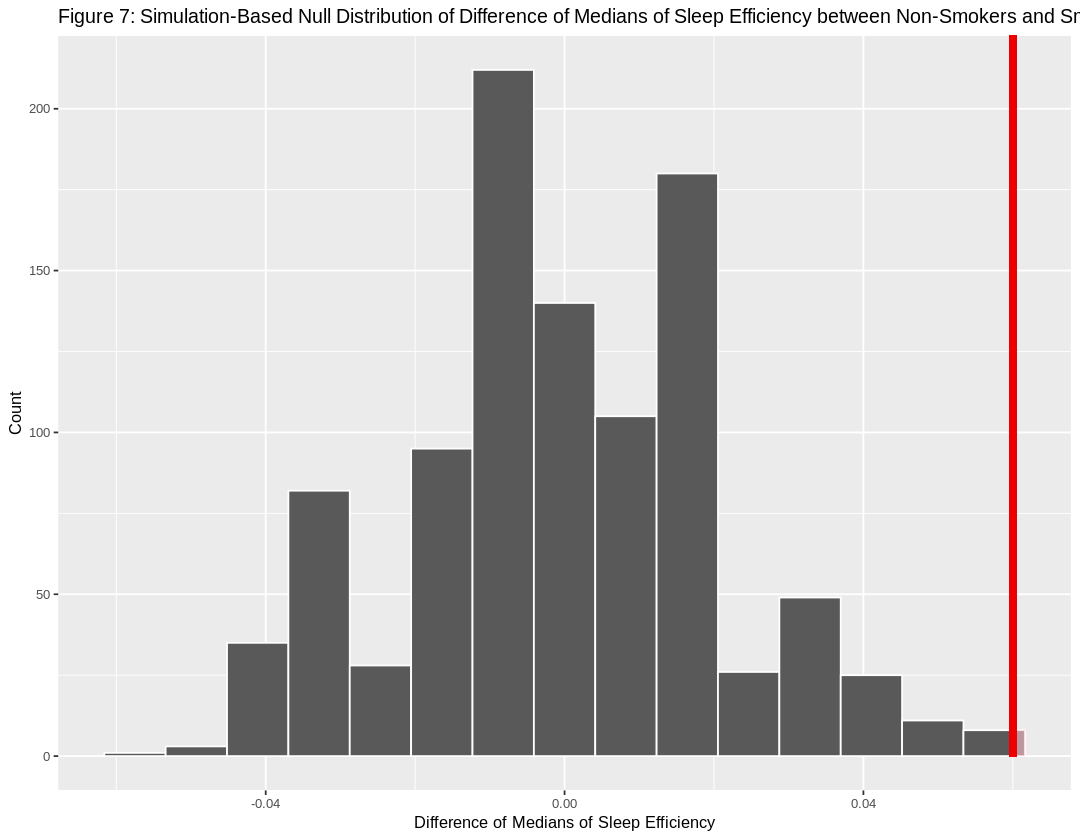

In [21]:
# Visualize the null distribution together with the observed difference.
# Shade the p-value.

null_visual <- null_diff_medians |> 
                visualize()+
                shade_p_value(obs_stat = obs_diff_medians, direction = "right")+
                labs(x = "Difference of Medians of Sleep Efficiency", y = "Count", 
                     title = "Figure 7: Simulation-Based Null Distribution of Difference of Medians of Sleep Efficiency between Non-Smokers and Smokers")+
                theme(text = element_text(size = 9.8))

null_visual

In [22]:
# Get the p-value
null_diff_medians %>% 
  get_p_value(obs_stat = obs_diff_medians, direction = "right")

p_value
<dbl>
0.003


#### Conclusion:

We get a p-value = 0.003, which is less than 0.05. Hence, we reject $H_0$ and favor the $H_1$ that smoking can affect sleep efficiency and make it worse, at 5% significance level.

## Comparison between bootstrapping and asymptotics method

We used bootstrap method(Simulation-based) and asymptotic method(t-test) to test the hypothesis of the difference in means of sleep efficiency between two groups of smokers. The results obtained by both methods are similar, with p-value reported as <0.001 and both rejecting the null hypothesis. This is because this dataset satisfies all the conditions for applying CLT and, hence, theory-based method can get similar results to the simulation-based method. However, we believe that the bootstrap method is better for this study because this method can be easily and quickly obtained, without requiring many assumptions.


# Discussion
1. Summarize what you found, and the implications/impact of your findings.
- Findings:
Hypothesis testing revealed a statistically significant difference in both means and medians of sleep efficiency between smokers and non-smokers. Specifically, non-smokers have a higher mean and median sleep efficiency than smokers.
Confidence intervals further supported this by providing a range of plausible values for the difference in means, which did not contain 0, indicating a significant difference.
- Implications: Such findings could have considerable implications for public health                        initiatives. Demonstrating a significant correlation between smoking and diminished sleep    efficiency could support the development of targeted interventions aiming to improve sleep health among smokers. 

2. If relevant, discuss whether your results were what you expected to find.

Before initiating the study, based on prior research and general knowledge about the health detriments of smoking, we anticipate finding significant differences in means and medians of sleep efficiency between smokers and non-smokers.
Upon analyzing our dataset, the results did align with our expectations.

3. Discuss future questions/research this study could lead to.

i. Do these effects differ with the duration or intensity of smoking?

ii. How do different cessation methods impact sleep efficiency in former smokers?

iii. Are there interventions that can mitigate the impact of smoking on sleep efficiency?


# Reference
Equilibriumm. (2023, February 21). *Sleep efficiency dataset.* Kaggle. https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency

Jaehne, A., Unbehaun, T., Feige, B., Lutz, U. C., Batra, A., & Riemann, D. (2012). How smoking affects sleep: a polysomnographical analysis. *Sleep medicine, 13*(10), 1286-1292.

Ramos, A. R., Weng, J., Wallace, D. M., Petrov, M. R., Wohlgemuth, W. K., Sotres-Alvarez, D., ... & Patel, S. R. (2018). Sleep patterns and hypertension using actigraphy in the Hispanic Community Health Study/Study of Latinos. Chest, 153(1), 87-93.

Reed, D. L., & Sacco, W. P. (2016). Measuring sleep efficiency: what should the denominator be?. *Journal of clinical sleep medicine, 12*(2), 263-266.

